# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
# Verificando as informações da coluna 'munResLat'
sinasc_raw[['munResLat']].head()

,munResLat
0,-11.93554
1,-11.93554
2,-11.93554
3,-12.13178
4,-11.93554


In [4]:
# Verificando a latitue máxima
sinasc_raw['munResLat'].max()

-8.76889

In [5]:
# Verificando a latitue mínima
sinasc_raw['munResLat'].min()

-13.49976

In [6]:
# Cortando a coluna 'munResLat' em duas partes
sinasc_cut_lat = pd.cut(sinasc_raw['munResLat'], [-13.5, -10.5, -8.5])

In [7]:
# As variáveis a serem usadas serão: 'CONSULTAS' e 'SEMAGESTAC'
sinasc_raw[['CONSULTAS', 'SEMAGESTAC']].groupby(sinasc_cut_lat).agg([('Soma', 'sum'),
                                                                ('Média', 'mean'), 
                                                                ('Mínima', 'min'),
                                                                ('Máxima', 'max'), 
                                                                ('Mediana', np.median),
                                                                ('Desvio Padrão', np.std),
                                                                ('Variância', np.var)])

CONSULTAS                                                \
                    Soma     Média Mínima Máxima Mediana Desvio Padrão   
munResLat                                                                
(-13.5, -10.5]     48000  3.694297      1      9     4.0      0.643372   
(-10.5, -8.5]      48662  3.467436      1      9     4.0      0.888240   

                         SEMAGESTAC                                   \
               Variância       Soma      Média Mínima Máxima Mediana   
munResLat                                                              
(-13.5, -10.5]  0.413928   482665.0  38.545360   19.0   45.0    39.0   
(-10.5, -8.5]   0.788970   511951.0  38.588302   21.0   45.0    39.0   

                                        
               Desvio Padrão Variância  
munResLat                               
(-13.5, -10.5]      2.012435  4.049895  
(-10.5, -8.5]       2.020722  4.083319

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
# Verificando as informações da coluna 'munResArea'
sinasc_raw[['munResArea']]

,munResArea
0,7067.025
1,7067.025
2,7067.025
3,3958.273
4,7067.025
...,...
27023,11518.915
27024,5126.723
27025,11518.915
27026,11518.915


In [9]:
# Verificando a área máxima
sinasc_raw['munResArea'].max()

34096.394

In [10]:
# Verificando a área mínima
sinasc_raw['munResArea'].min()

459.978

In [11]:
# Cortando a coluna 'munResArea' em duas partes
sinasc_cut_area = pd.cut(sinasc_raw['munResArea'], [450, 3000, 35000])

In [12]:
# As variáveis a serem usadas serão: 'QTDPARTCES' e 'QTDPARTNOR'
sinasc_raw[['QTDPARTCES', 'QTDPARTNOR']].groupby(sinasc_cut_area).agg([('Soma', 'sum'),
                                                                ('Média', 'mean'), 
                                                                ('Mínima', 'min'),
                                                                ('Máxima', 'max'), 
                                                                ('Mediana', np.median),
                                                                ('Desvio Padrão', np.std),
                                                                ('Variância', np.var)])

QTDPARTCES                                                \
                    Soma     Média Mínima Máxima Mediana Desvio Padrão   
munResArea                                                               
(450, 3000]       2952.0  0.572981    0.0    5.0     0.0      0.749368   
(3000, 35000]    10184.0  0.507070    0.0   12.0     0.0      0.744981   

                        QTDPARTNOR                                  \
              Variância       Soma     Média Mínima Máxima Mediana   
munResArea                                                           
(450, 3000]    0.561553     1912.0  0.371334    0.0   10.0     0.0   
(3000, 35000]  0.554997    12659.0  0.632982    0.0   41.0     0.0   

                                       
              Desvio Padrão Variância  
munResArea                             
(450, 3000]        0.856441  0.733490  
(3000, 35000]      1.278932  1.635668

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [13]:
# Verificando as informações da coluna 'munResAlt'
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [14]:
# Cortando a coluna 'munResAlt' em duas partes, usando o valor mínimo, médio e máximo.
sinasc_cut_alt = pd.cut(sinasc_raw['munResAlt'], [85, 180, 595])

In [15]:
# As variáveis a serem usadas serão: 'CONSULTAS' e 'SEMAGESTAC'
sinasc_raw[['CONSULTAS', 'SEMAGESTAC']].groupby(sinasc_cut_alt).agg([('Soma', 'sum'),
                                                                ('Média', 'mean'), 
                                                                ('Mínima', 'min'),
                                                                ('Máxima', 'max'), 
                                                                ('Mediana', np.median),
                                                                ('Desvio Padrão', np.std),
                                                                ('Variância', np.var)])

CONSULTAS                                                          \
                Soma     Média Mínima Máxima Mediana Desvio Padrão Variância   
munResAlt                                                                      
(85, 180]      66162  3.516076      1      9     4.0      0.839456  0.704687   
(180, 595]     29337  3.726280      1      9     4.0      0.612697  0.375398   

           SEMAGESTAC                                                           
                 Soma      Média Mínima Máxima Mediana Desvio Padrão Variância  
munResAlt                                                                       
(85, 180]    684533.0  38.567412   19.0   45.0    39.0      2.062394  4.253470  
(180, 595]   297806.0  38.555930   19.0   45.0    39.0      1.910900  3.651539

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [16]:
# Dicionário das regiões imediatas
regioes_imediatas = {
    'Candeias do Jamari': 'Porto Velho',
    'Guajará-Mirim': 'Porto Velho',
    'Itapuã do Oeste': 'Porto Velho',
    'Nova Mamoré': 'Porto Velho',
    'Porto Velho': 'Porto Velho',
    'Alto Paraíso': 'Ariquemes',
    'Ariquemes': 'Ariquemes',
    'Buritis': 'Ariquemes',
    'Cacaulândia': 'Ariquemes',
    'Campo Novo de Rondônia': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Rio Crespo': 'Ariquemes',
    'Governador Jorge Teixeira': 'Jaru',
    'Jaru': 'Jaru',
    'Machadinho d''Oeste': 'Jaru',
    'Theobroma': 'Jaru',
    'Vale do Anari': 'Jaru',
    'Alvorada d''Oeste': 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Ji-Paraná': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',
    'Alta Floresta d''Oeste': 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    'Espigão d''Oeste': 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    'Nova Brasilândia d''Oeste': 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    'Santa Luzia d''Oeste': 'Cacoal',
    'São Felipe d''Oeste': 'Cacoal',
    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena',
    'Vilhena': 'Vilhena'
}

In [17]:
# Setando a coluna 'munResNome' como índice do dataframe
sinasc_reg_imediatas = sinasc_raw.set_index('munResNome')

In [18]:
# Calculando a média da idade das mães 
sinasc_reg_imediatas.groupby(regioes_imediatas)['IDADEMAE'].mean()

munResNome
Ariquemes      25.459635
Cacoal         26.434757
Jaru           25.805579
Ji-Paraná      26.108682
Porto Velho    26.166303
Vilhena        26.417143
Name: IDADEMAE, dtype: float64

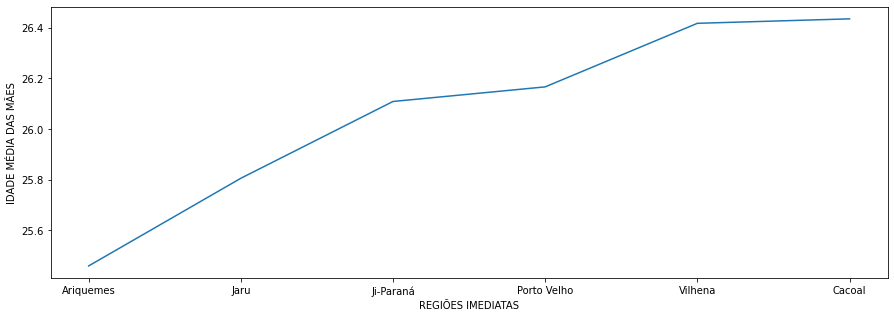

In [19]:
# Ordenando os dados e plotando o gráfico
sinasc_reg_imediatas.groupby(regioes_imediatas)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5]);

plt.ylabel('IDADE MÉDIA DAS MÃES');
plt.xlabel('REGIÕES IMEDIATAS');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [20]:
# Criando o mapping

idh = {'Porto Velho' : 'IDH-M alto', 
           'Vilhena' : 'IDH-M alto', 
           'Cacoal' : 'IDH-M alto', 
           'Ji-Paraná' : 'IDH-M alto', 
           'Pimenta Bueno' : 'IDH-M alto', 
           'Ariquemes' : 'IDH-M alto',
           'Rolim de Moura' : 'IDH-M alto',
           'Cerejeiras' : 'IDH-M médio',
           'Jaru' : 'IDH-M médio',
           'Colorado do Oeste' : 'IDH-M médio',
           'Ouro Preto do Oeste' : 'IDH-M médio',
           "Espigão d'Oeste" : 'IDH-M médio',
           "Santa Luzia d'Oeste" : 'IDH-M médio',
           'Pimenteiras do Oeste' : 'IDH-M médio',
           'Presidente Médici' : 'IDH-M médio',
           'Castanheiras' : 'IDH-M médio',
           'Guajará-Mirim' : 'IDH-M médio',
           'Chupinguaia' : 'IDH-M médio',
           'Cabixi' : 'IDH-M médio',
           'Candeias do Jamari' : 'IDH-M médio',
           "São Felipe d'Oeste" : 'IDH-M médio',
           'Cacaulândia' : 'IDH-M médio',
           'São Miguel do Guaporé' : 'IDH-M médio',
           'Mirante da Serra' : 'IDH-M médio',
           "Alvorada d'Oeste" : 'IDH-M médio',
           'Teixeirópolis' : 'IDH-M médio',
           "Nova Brasilândia d'Oeste" : 'IDH-M médio',
           'Rio Crespo' : 'IDH-M médio',
           'Primavera de Rondônia' : 'IDH-M médio',
           "Alta Floresta d'Oeste" : 'IDH-M médio',
           'Ministro Andreazza' : 'IDH-M médio',
           'Novo Horizonte do Oeste' : 'IDH-M médio',
           'Vale do Paraíso' : 'IDH-M médio',
           'Alto Paraíso' : 'IDH-M médio',
           'Parecis' : 'IDH-M médio',
           'Buritis' : 'IDH-M médio',
           'Itapuã do Oeste' : 'IDH-M médio',
           'Corumbiara' : 'IDH-M médio',
           'Cujubim' : 'IDH-M médio',
           'Costa Marques' : 'IDH-M médio',
           'São Francisco do Guaporé' : 'IDH-M médio',
           'Urupá' : 'IDH-M médio',
           'Monte Negro' : 'IDH-M médio',
           'Seringueiras' : 'IDH-M baixo',
           'Governador Jorge Teixeira' : 'IDH-M baixo',
           "Machadinho d'Oeste" : 'IDH-M baixo',
           'Campo Novo de Rondônia' : 'IDH-M baixo',
           'Alto Alegre dos Parecis' : 'IDH-M baixo',
           'Theobroma' : 'IDH-M baixo',
           'Nova União' : 'IDH-M baixo',
           'Nova Mamoré' : 'IDH-M baixo',
           'Vale do Anari' : 'IDH-M baixo'}

In [21]:
# idh por 'QTDPARTNOR' (quantidade de parto normal)
sinasc_raw.set_index('munResNome')['QTDPARTNOR'].groupby(idh).agg([('Soma', 'sum'),
                                                                ('Média', 'mean'), 
                                                                ('Mínima', 'min'),
                                                                ('Máxima', 'max'), 
                                                                ('Mediana', np.median),
                                                                ('Desvio Padrão', np.std),
                                                                ('Variância', np.var)])

,Soma,Média,Mínima,Máxima,Mediana,Desvio Padrão,Variância
munResNome,,,,,,,
IDH-M alto,9017.0,0.578495,0.0,40.0,0.0,1.161221,1.348435
IDH-M baixo,748.0,0.620232,0.0,41.0,0.0,1.602919,2.569350
IDH-M médio,3795.0,0.589560,0.0,14.0,0.0,1.177900,1.387448


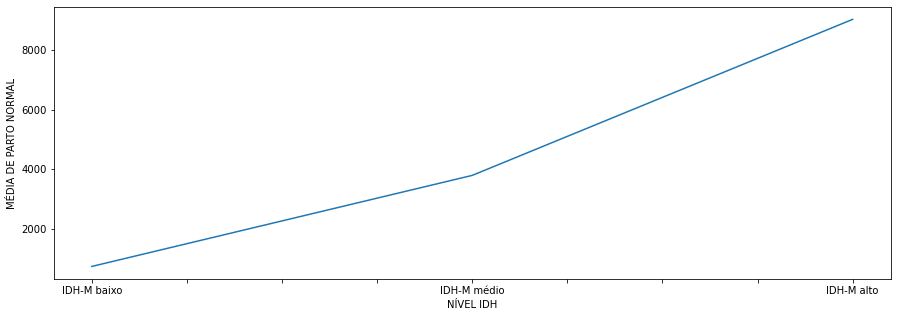

In [22]:
# Plotando o gráfico do idh por 'QTDPARTNOR' (quantidade de parto normal)
sinasc_raw.set_index('munResNome').groupby(idh)['QTDPARTNOR'].sum().sort_values().plot(figsize=[15 ,5]);

plt.ylabel('MÉDIA DE PARTO NORMAL');
plt.xlabel('NÍVEL IDH');

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [23]:
# mapping do IFDM

ifmd = {
    "Ariquemes": "IFDM Moderado",
    "Vilhena": "IFDM Moderado",
    "Pimenta Bueno": "IFDM Moderado",
    "Porto Velho": "IFDM Moderado",
    "Ji-Paraná": "IFDM Moderado",
    "Cacoal": "IFDM Moderado",
    "Santa Luzia d'Oeste": "IFDM Moderado",
    "Rolim de Moura": "IFDM Moderado",
    "Chupinguaia": "IFDM Moderado",
    "São Miguel do Guaporé": "IFDM Moderado",
    "Pimenteiras do Oeste": "IFDM Moderado",
    "Teixeirópolis": "IFDM Moderado",
    "Colorado do Oeste": "IFDM Moderado",
    "Jaru": "IFDM Moderado",
    "Rio Crespo": "IFDM Moderado",
    "Primavera de Rondônia": "IFDM Moderado",
    "Alta Floresta d'Oeste": "IFDM Moderado",
    "Ouro Preto do Oeste": "IFDM Moderado",
    "São Francisco do Guaporé": "IFDM Moderado",
    "Candeias do Jamari": "IFDM Moderado",
    "Buritis": "IFDM Moderado",
    "São Felipe d'Oeste": "IFDM Moderado",
    "Presidente Médici": "IFDM Moderado",
    "Cerejeiras": "IFDM Moderado",
    "Monte Negro": "IFDM Moderado",
    "Urupá": "IFDM Moderado",
    "Espigão d'Oeste": "IFDM Regular",
    "Seringueiras": "IFDM Regular",
    "Alvorada d'Oeste": "IFDM Regular",
    "Itapuã do Oeste": "IFDM Regular",
    "Cabixi": "IFDM Regular",
    "Novo Horizonte do Oeste": "IFDM Regular",
    "Nova Brasilândia d'Oeste": "IFDM Regular",
    "Vale do Paraíso": "IFDM Regular",
    "Corumbiara": "IFDM Regular",
    "Alto Paraíso": "IFDM Regular",
    "Cacaulândia": "IFDM Regular",
    "Vale do Anari": "IFDM Regular",
    "Ministro Andreazza": "IFDM Regular",
    "Costa Marques": "IFDM Regular",
    "Nova União": "IFDM Regular",
    "Guajará-Mirim": "IFDM Regular",
    "Mirante da Serra": "IFDM Regular",
    "Parecis": "IFDM Regular",
    "Castanheiras": "IFDM Regular",
    "Theobroma": "IFDM Regular",
    "Machadinho d'Oeste": "IFDM Regular",
    "Campo Novo de Rondônia": "IFDM Regular",
    "Nova Mamoré": "IFDM Regular",
    "Cujubim": "IFDM Regular",
    "Alto Alegre dos Parecis": "IFDM Regular",
    "Governador Jorge Teixeira": "IFDM Regular"
}

In [24]:
# ifmd por 'QTDPARNOR' (quantidade de parto normal)
sinasc_raw.set_index('munResNome')['QTDPARTNOR'].groupby(ifmd).agg([('Soma', 'sum'),
                                                                ('Média', 'mean'), 
                                                                ('Mínima', 'min'),
                                                                ('Máxima', 'max'), 
                                                                ('Mediana', np.median),
                                                                ('Desvio Padrão', np.std),
                                                                ('Variância', np.var)])

,Soma,Média,Mínima,Máxima,Mediana,Desvio Padrão,Variância
munResNome,,,,,,,
IFDM Moderado,11010.0,0.558033,0.0,40.0,0.0,1.128835,1.274269
IFDM Regular,2550.0,0.728571,0.0,41.0,0.0,1.494789,2.234394


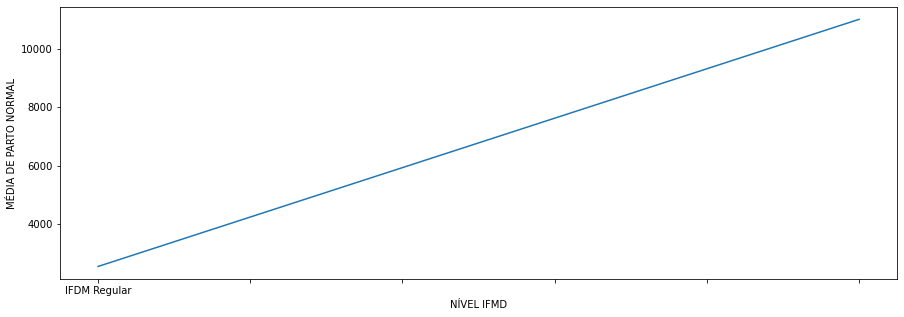

In [25]:
# Plotando o gráfico do idh por 'QTDPARTNOR' (quantidade de parto normal)
sinasc_raw.set_index('munResNome').groupby(ifmd)['QTDPARTNOR'].sum().sort_values().plot(figsize=[15 ,5]);

plt.ylabel('MÉDIA DE PARTO NORMAL');
plt.xlabel('NÍVEL IFMD');

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [26]:
# mapping do PIB

pib = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}

In [27]:
# PIB por 'QTDPARNOR' (quantidade de parto normal)
sinasc_raw.set_index('munResNome')['QTDPARTNOR'].groupby(pib).agg([('Soma', 'sum'),
                                                                ('Média', 'mean'), 
                                                                ('Mínima', 'min'),
                                                                ('Máxima', 'max'), 
                                                                ('Mediana', np.median),
                                                                ('Desvio Padrão', np.std),
                                                                ('Variância', np.var)])

,Soma,Média,Mínima,Máxima,Mediana,Desvio Padrão,Variância
munResNome,,,,,,,
Acima de 1 bilhão,9368.0,0.569137,0.0,40.0,0.0,1.147284,1.316260
Acima de 100 Milhões,885.0,0.487603,0.0,14.0,0.0,1.083980,1.175012
Acima de 200 Milhões,235.0,0.531674,0.0,41.0,0.0,2.146588,4.607838
Acima de 300 Milhões,652.0,0.527082,0.0,8.0,0.0,1.045232,1.092510
Acima de 500 Milhões,2246.0,0.773682,0.0,10.0,0.0,1.358577,1.845730
Até 100 Milhões,174.0,0.466488,0.0,6.0,0.0,1.003798,1.007610


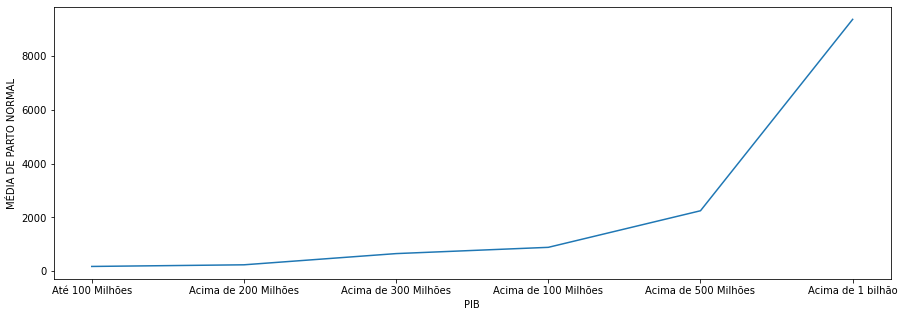

In [28]:
# Plotando o gráfico do PIB por 'QTDPARTNOR' (quantidade de parto normal)
sinasc_raw.set_index('munResNome').groupby(pib)['QTDPARTNOR'].sum().sort_values().plot(figsize=[15 ,5]);

plt.ylabel('MÉDIA DE PARTO NORMAL');
plt.xlabel('PIB');

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

- Quanto maior o IDH maior o número de partos normais;
- Quanto menor a altitude do município, maior a média de partos normais; 
- Quanto maior a altitude, maior a média de partos cesáreos;
- Quanto maior a aréa do município, maior os valores médios de partos normais e cesarianas;
- O maior número de municípios possui IDH médio.